<a href="https://colab.research.google.com/github/rodriglopezp/Rodrigo-A01285383/blob/main/Presentaci%C3%B3n_Rodrigo_L%C3%B3pez_Portillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Costo de los Airbnb en México

In [306]:
path = 'https://raw.githubusercontent.com/rodriglopezp/Rodrigo-A01285383/main/listings.csv'
import pandas as pd
import numpy as np

In [307]:
df = pd.read_csv(path)
df.head()

,source,host_response_time,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,property_type,room_type,accommodates,bedrooms,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes
0,city scrape,NaN,NaN,f,1,t,Entire villa,Entire home/apt,2,1.0,...,1.0,7.0,NaN,t,363,0,NaN,f,1,1
1,city scrape,within a day,83%,t,6,t,Entire condo,Entire home/apt,2,1.0,...,3.0,21.0,NaN,t,225,1,5.00,f,6,6
2,city scrape,within a day,83%,t,6,t,Entire condo,Entire home/apt,4,2.0,...,3.0,30.0,NaN,t,226,4,5.00,f,6,6
3,city scrape,within an hour,98%,t,1,t,Entire rental unit,Entire home/apt,4,2.0,...,3.0,1125.0,NaN,t,331,199,4.76,t,1,1
4,previous scrape,NaN,0%,f,1,t,Shared room in rental unit,Shared room,2,NaN,...,1.0,1125.0,NaN,f,0,0,NaN,f,1,0


## Descripción base de datos
Esta base de datos muestra el precio que tienen diferentes Airbnb que pueden ser rentados en la ciudad de México. En la base de datos también se muestran varias variables ya sean para describir el perfil del host, o para describir el lugar que puede ser rentado.

In [308]:
df.columns

Index(['source', 'host_response_time', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes'],
      dtype='object')

In [309]:
df.isnull().any()

,0
source,False
host_response_time,True
host_acceptance_rate,True
host_is_superhost,True
host_listings_count,False
host_has_profile_pic,False
property_type,False
room_type,False
accommodates,False
bedrooms,True


In [310]:
df.shape

(26318, 28)

In [311]:
df.drop(['source','host_listings_count','calculated_host_listings_count','minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
         ],axis = 1, inplace  = True)

In [312]:
df.columns

Index(['host_response_time', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'property_type', 'room_type', 'accommodates',
       'bedrooms', 'beds', 'price', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'instant_bookable',
       'calculated_host_listings_count_entire_homes'],
      dtype='object')

In [313]:
df.shape

(26318, 15)

In [314]:
df.columns

Index(['host_response_time', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'property_type', 'room_type', 'accommodates',
       'bedrooms', 'beds', 'price', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'instant_bookable',
       'calculated_host_listings_count_entire_homes'],
      dtype='object')

In [315]:
df.drop(['calculated_host_listings_count_entire_homes', 'host_response_time', 'property_type'],axis = 1, inplace  = True)

In [316]:
df

,host_acceptance_rate,host_is_superhost,host_has_profile_pic,room_type,accommodates,bedrooms,beds,price,availability_365,number_of_reviews,review_scores_rating,instant_bookable
0,NaN,f,t,Entire home/apt,2,1.0,1.0,"$3,437.00",363,0,NaN,f
1,83%,t,t,Entire home/apt,2,1.0,2.0,"$3,506.00",225,1,5.00,f
2,83%,t,t,Entire home/apt,4,2.0,4.0,"$5,499.00",226,4,5.00,f
3,98%,t,t,Entire home/apt,4,2.0,2.0,$858.00,331,199,4.76,t
4,0%,f,t,Shared room,2,NaN,1.0,"$1,718.00",0,0,NaN,f
...,...,...,...,...,...,...,...,...,...,...,...,...
26313,100%,t,t,Entire home/apt,4,2.0,2.0,"$1,400.00",267,0,NaN,t
26314,99%,f,t,Entire home/apt,4,2.0,2.0,$766.00,362,0,NaN,t
26315,100%,f,t,Entire home/apt,2,1.0,1.0,$349.00,266,0,NaN,t
26316,NaN,f,t,Entire home/apt,5,3.0,3.0,"$1,600.00",268,0,NaN,t


In [317]:
df.columns

Index(['host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable'],
      dtype='object')

### Explicación de las variables
- Host Acceptance Rate: que tan aceptado esta el host en la aplicación. Categórica
* Host is superhost: te dice si el host es superhost o no. Superhost se refiere a ser anfitriones con excelentes resultados.
 Categórica.
* Host has profile pic: te dice si el host tiene foto de perfil o no. Categórica
* Room type: te dice el tipo de cuarto, también si es una casa completa o solo un cuarto. Categórica.
* Accomodates: el número de personas que se pueden hospedar en el Airbnb.
- Bedrooms: el número de cuartos con los que cuenta. Numérico
- Beds: el número de camas que hay en el lugar. Numérico
- Price: el precio de la renta de la Airbnb. Numérico
- Availability 365: te dice cuantos días del año está disponible. Numérico
- Number of reviews: el número de reseñas que tiene el lugar. Númerico
- Review scores rating: el resultado de las reseñas. Númerico
- Instant bookable: te dice si lo puedes reservar al instante o no. Categórico.





In [318]:
df.isnull().sum()

,0
host_acceptance_rate,2288
host_is_superhost,1015
host_has_profile_pic,0
room_type,0
accommodates,0
bedrooms,7568
beds,226
price,0
availability_365,0
number_of_reviews,0


In [319]:
df.dropna(inplace=True)

In [320]:
df.isnull().sum()

,0
host_acceptance_rate,0
host_is_superhost,0
host_has_profile_pic,0
room_type,0
accommodates,0
bedrooms,0
beds,0
price,0
availability_365,0
number_of_reviews,0


In [321]:
df.shape

(14785, 12)

In [322]:
df['price']=df['price'].str.replace('$','')
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].astype(float)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

## Gráficos utilizados
- boxplot
- pie chart
- histograma
- violinplot
- contingency table
- scatterplot
- heatmap
- bar chart

## Pregunta de investigación 1
- Normalmente, cuantos días están disponibles los Airbnb a través de los 365 días del año?

In [323]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

La mediana de la edad de los días disponibles es: 279.0


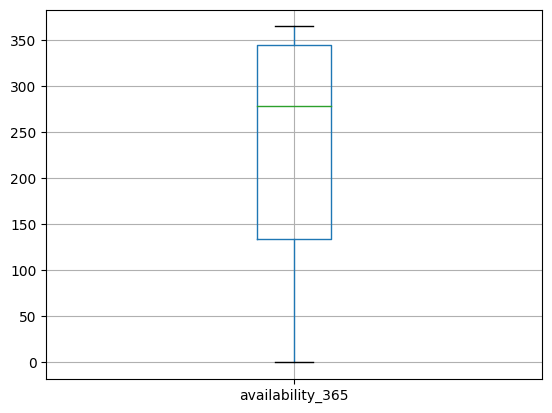

In [324]:
boxplot_dias = df.boxplot(column=['availability_365'])
mediana_dias = df['availability_365'].median()
print('La mediana de la edad de los días disponibles es:', mediana_dias)

## Conclusión
Normalmente, los Airbnb en la Ciudad de México están disponibles 279 días de los 365 días del año.

## Pregunta de investigación 2
Que porcentaje de los hosts son superhost?

In [325]:
superhost = df['host_is_superhost'].value_counts()
superhost

,count
host_is_superhost,
f,7362
t,6369


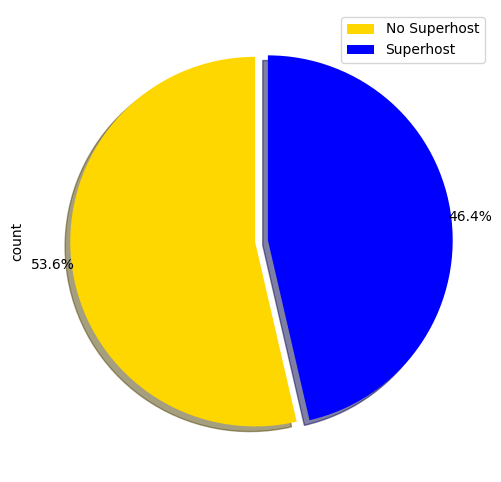

In [326]:
color_list = ['gold', 'blue']
exp_list = [0.03, 0.04]
superhost.plot(kind='pie',
                                  colors = color_list,
                                  explode = exp_list,
                                  figsize = (15,6),
                                  autopct = '%1.1f%%',
                                  pctdistance = 1.1,
                                  labels = None,
                                  shadow = True,
                                  startangle = 90,
                                  )
plt.legend(labels = ['No Superhost', 'Superhost'],
           bbox_to_anchor = (1.0, 1.0))

## Conclusión
El 46.4% de los hosts son superhosts, mientras que el 53.6% no son superhosts. Esto lo que indica es que la mayoría no son superhosts.

## Pregunta de investigación 3
Si quieres rentar un Airbnb en la ciudad de México, más o menos en cuanto te saldría hacer la renta?

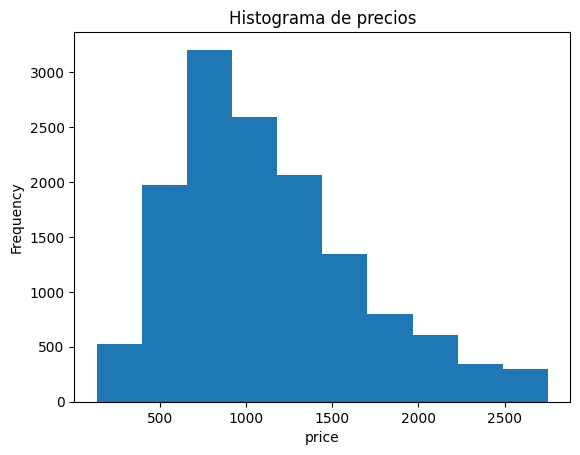

In [327]:
plt.hist(df['price'])
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Histograma de precios')
plt.show()


## Conclusión
Si quieres rentar un Airbnb en la ciudad de México, lo más probable es que el Airbnb te salga en un rango de precio de 800 a 1500 pesos.

## Pregunta de inverstigación 4
Cual es la relación que existe entre el rating de las reviews y los superhosts?

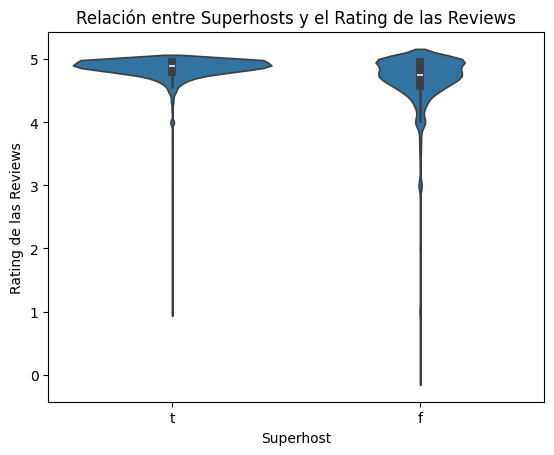

In [328]:
import seaborn as sns
sns.violinplot(x='host_is_superhost', y='review_scores_rating', data=df)
plt.xlabel('Superhost')
plt.ylabel('Rating de las Reviews')
plt.title('Relación entre Superhosts y el Rating de las Reviews')
plt.show()

La relación que existe es que normalmente, los superhosts tienen mejor calificación que los que no son superhosts. Como se puede observar en las gráficas los superhosts tienen una mejor concentración en las mejores calificaciones.

## Pregunta de investigación 5
Existe una relación entre ser superhost y tener una foto de perfil?

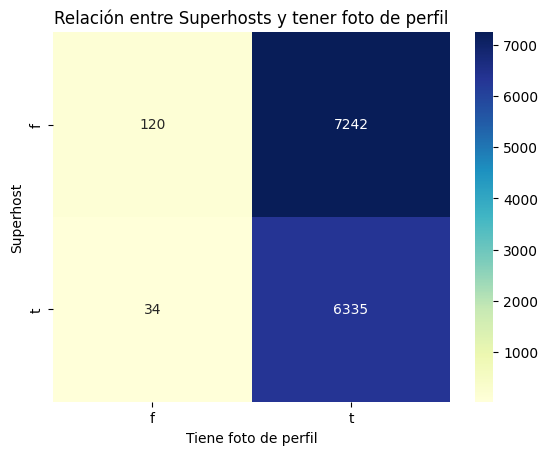

In [329]:
contingency_table = pd.crosstab(df['host_is_superhost'], df['host_has_profile_pic'])
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Tiene foto de perfil')
plt.ylabel('Superhost')
plt.title('Relación entre Superhosts y tener foto de perfil')
plt.show()

## Conclusión
Se podría decir que no existe una relación tan fuerte entre ser superhost y tener foto de perfil. Sin embargo, si son menos los superhosts que no tienen foto de perfil, que los no-superhosts que no tienen foto de perfil.

## Pregunta de investigación 6
Existe una relación entre los días del año disponible y el precio de un Airbnb?

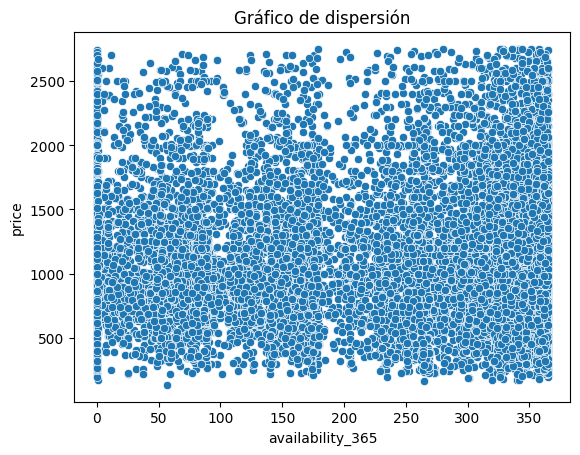

In [330]:
sns.scatterplot(x='availability_365', y='price', data=df)
plt.xlabel('availability_365')
plt.ylabel('price')
plt.title('Gráfico de dispersión')
plt.show()

## Conclusión
Se podría decir que no existe una relación tan fuerte entre los días del año que el Airbnb esta disponible y el precio del Airbnb.

## Pregunta de investigación 7
Cuál es la correlación que hay entre las variables siguientes variables:
- Precio
- Camas
- Cuartos
- Días disponibles del año
- Huespedes


<Axes: >

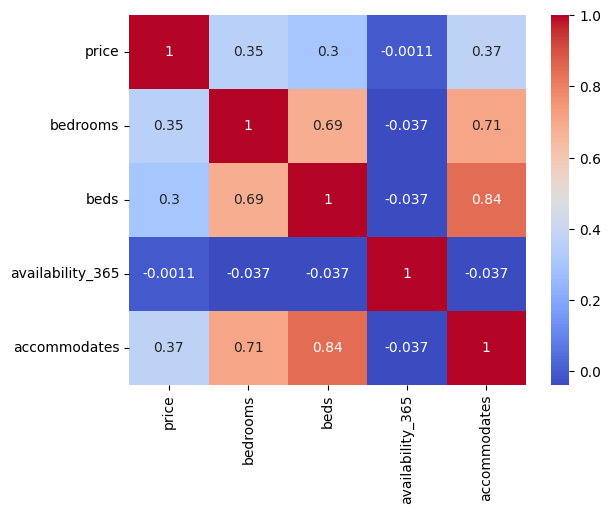

In [331]:
df_subset = df[['price', 'bedrooms', 'beds', 'availability_365', 'accommodates']]
correlation_matrix = df_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

## Conclusión
En este caso se puede observar que las dos variables con mayor correlación es el número de camas y el número de huespedes. En la gráfica de dispersión se puede observar como tienen una correlación positiva ya que entre mayor número de huespedes permitidos, mayor es el número de camas.

## Pregunta de investigación 8
Cuál de las tres opciones de room type, es la más barata para reservar?

In [332]:
df['room_type'].value_counts()

,count
room_type,
Entire home/apt,12369
Private room,1304
Hotel room,58


In [333]:
dfa = df.groupby('room_type')['price'].mean()
dfa

,price
room_type,
Entire home/apt,1164.852373
Hotel room,1106.603448
Private room,816.046012


<Axes: xlabel='room_type'>

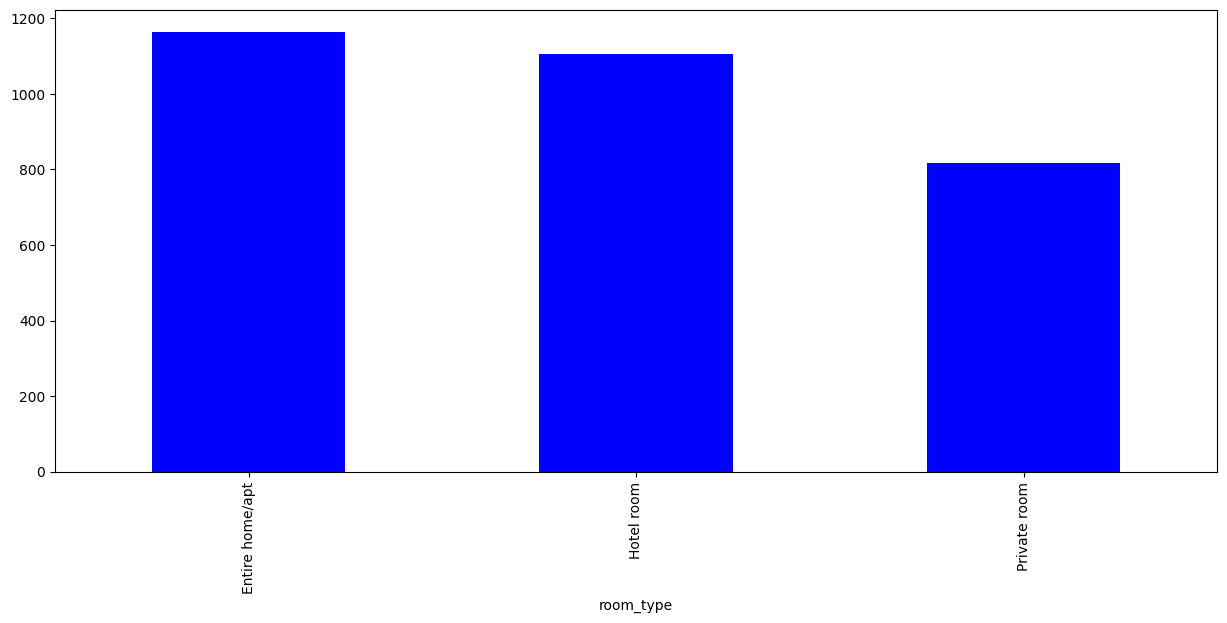

In [334]:
dfa.plot(kind='bar', figsize=(15,6), color='blue')

## Conclusión
Lo que saldría más barato sería reservar un cuarto o una habitación privadad en la Ciudad de México.

## Pregunta de investigación
Alrededor de cuanto costaría un airbnb que permite hospedar a 6 huéspedes?


In [335]:
import statsmodels.api as sm
from sklearn import linear_model
favs = ['price', 'accommodates']
ndf = df[favs].dropna()
modelA = sm.OLS.from_formula('price ~ accommodates', data = ndf)
resultA = modelA.fit()
summary = resultA.summary
summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7d1d420803a0>>

In [336]:
modelA.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     2196.
Date:                Fri, 06 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:14:18   Log-Likelihood:            -1.0458e+05
No. Observations:               13731   AIC:                         2.092e+05
Df Residuals:                   13729   BIC:                         2.092e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      747.4436      9.206     81.190      0.000     729.398     765.489
accommodates   107.0009      2.283     46.865      0.000     102.526     111.476
==============================================================================
Omnibus:                     1274.657   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1674.681
Skew:                           0.798   Prob(JB):                         0.00
Kurtosis:                       3.614   Cond. No.                         9.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [337]:
params = resultA.params
params
Intercept = params['Intercept']
accomodates_coef = params['accommodates']

In [338]:
accomodates_coef

107.00088084803697

In [339]:
resi = modelA.fit().resid
resi
reg_vals = modelA.fit().fittedvalues
reg_vals

,0
3,1175.447161
9,1175.447161
11,961.445399
16,1817.452446
18,1389.448923
...,...
26009,1175.447161
26017,1175.447161
26056,1389.448923
26161,961.445399


In [340]:
study = [ndf['accommodates'], ndf['price'], resi, reg_vals]
study

[3         4
 9         4
 11        2
 16       10
 18        6
          ..
 26009     4
 26017     4
 26056     6
 26161     2
 26167     3
 Name: accommodates, Length: 13731, dtype: int64,
 3         858.0
 9        1890.0
 11        737.0
 16       1099.0
 18       1400.0
           ...  
 26009     857.0
 26017     373.0
 26056     582.0
 26161     400.0
 26167    1157.0
 Name: price, Length: 13731, dtype: float64,
 3       -317.447161
 9        714.552839
 11      -224.445399
 16      -718.452446
 18        10.551077
             ...    
 26009   -318.447161
 26017   -802.447161
 26056   -807.448923
 26161   -561.445399
 26167     88.553720
 Length: 13731, dtype: float64,
 3        1175.447161
 9        1175.447161
 11        961.445399
 16       1817.452446
 18       1389.448923
             ...     
 26009    1175.447161
 26017    1175.447161
 26056    1389.448923
 26161     961.445399
 26167    1068.446280
 Length: 13731, dtype: float64]

In [341]:
study_table = pd.concat(study, axis = 1)
study_table.columns = ["Accommodates", "Price", "Residuals", "Regression Values"]
study_table

,Accommodates,Price,Residuals,Regression Values
3,4,858.0,-317.447161,1175.447161
9,4,1890.0,714.552839,1175.447161
11,2,737.0,-224.445399,961.445399
16,10,1099.0,-718.452446,1817.452446
18,6,1400.0,10.551077,1389.448923
...,...,...,...,...
26009,4,857.0,-318.447161,1175.447161
26017,4,373.0,-802.447161,1175.447161
26056,6,582.0,-807.448923,1389.448923
26161,2,400.0,-561.445399,961.445399


## Ecuación de regresión
- price = b0 + b1*accomodates_val
- price = 747.44 + b1*107.0008888

In [343]:
accommodates_val = 6
print(f'El costo aproximado de un Airbnb que admite {accommodates_val} is \t:', Intercept + accomodates_coef*accommodates_val)

El costo aproximado de un Airbnb que admite 6 is 	: 1389.4489228456382


## Conclusión
El costo aproximado de un Airbnb que admite a seis huespedes es de $1389.44

## Pregunta de investigación
Cuanto cuesta en promedio reservar un cuarto privado en la Ciudad de México con Airbnb?

In [344]:
favs2 = ['price', 'room_type']
ndf = df[favs2].dropna()
modelb = sm.OLS.from_formula('price ~ room_type', data = ndf)
resultb = modelb.fit()
summary = resultb.summary

In [345]:
modelb.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     265.9
Date:                Fri, 06 Sep 2024   Prob (F-statistic):          4.94e-114
Time:                        16:14:20   Log-Likelihood:            -1.0534e+05
No. Observations:               13731   AIC:                         2.107e+05
Df Residuals:                   13728   BIC:                         2.107e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1164.8524      4.672    249.353      0.000    1155.696    1174.009
room_type[T.Hotel room]     -58.2489     68.379     -0.852      0.394    -192.282      75.784
room_type[T.Private room]  -348.8064     15.127    -23.059      0.000    -378.457    -319.156
==============================================================================
Omnibus:                     1388.487   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1842.392
Skew:                           0.879   Prob(JB):                         0.00
Kurtosis:                       3.358   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [346]:
resi2 = modelb.fit().resid
resi2
reg_vals2 = modelb.fit().fittedvalues
reg_vals2

,0
3,1164.852373
9,1164.852373
11,1164.852373
16,1164.852373
18,1164.852373
...,...
26009,1164.852373
26017,1164.852373
26056,1164.852373
26161,1164.852373


In [347]:
study2 = [ndf['room_type'], ndf['price'], resi2, reg_vals2]
study2

[3        Entire home/apt
 9        Entire home/apt
 11       Entire home/apt
 16       Entire home/apt
 18       Entire home/apt
               ...       
 26009    Entire home/apt
 26017    Entire home/apt
 26056    Entire home/apt
 26161    Entire home/apt
 26167    Entire home/apt
 Name: room_type, Length: 13731, dtype: object,
 3         858.0
 9        1890.0
 11        737.0
 16       1099.0
 18       1400.0
           ...  
 26009     857.0
 26017     373.0
 26056     582.0
 26161     400.0
 26167    1157.0
 Name: price, Length: 13731, dtype: float64,
 3       -306.852373
 9        725.147627
 11      -427.852373
 16       -65.852373
 18       235.147627
             ...    
 26009   -307.852373
 26017   -791.852373
 26056   -582.852373
 26161   -764.852373
 26167     -7.852373
 Length: 13731, dtype: float64,
 3        1164.852373
 9        1164.852373
 11       1164.852373
 16       1164.852373
 18       1164.852373
             ...     
 26009    1164.852373
 26017    1164.85

In [348]:
df['room_type'].value_counts()

,count
room_type,
Entire home/apt,12369
Private room,1304
Hotel room,58


In [349]:
resultb.params

,0
Intercept,1164.852373
room_type[T.Hotel room],-58.248925
room_type[T.Private room],-348.806361


In [350]:
params = resultb.params
params
Intercept2 = params['Intercept']
room_type_coef2 = params['room_type[T.Private room]']

In [351]:
room_type_coef2

-348.8063605977149

In [352]:
Intercept2

1164.8523728676516

Ecuación de regresión
- price = b0 + b1 * Private room + b2 * Hotel Room
- price = 1164.8523 - 348.806361 * Private room - 58.248925 * Hotel Room
  

In [353]:
print(f'El costo aproximado de un cuarto privado en la Ciudad de México es de\t:', Intercept2 + room_type_coef2)

El costo aproximado de un cuarto privado en la Ciudad de México es de	: 816.0460122699367


## Conclusión
Se puede concluir que el rentar un cuarto privado en la Ciudad de México costaría alrededor de $816.04.